In [67]:
library(tidyverse)
library(nycflights13)
# this lecture uses some additional packages:
# install.packages(c("Lahman", "priceR", "DBI", "RSQLite", "priceR"))

# Lecture 09: More on relational data; SQL
<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand how to [filter data using joins](#Filtering-joins)
* Know to execute basic [SQL commands](#SQL-Commands)
</div>


## Review of last lecture
Last lecture we learned how to join data from one table to another. The main function we care about is `left_join(x, y, by=<key>)`, which tries to find a matching key in the `y` table for every row in the `x` table.

![match example](https://r4ds.hadley.nz/diagrams/join/left.png)

## Exercise
Let's refresh our memory about how joins work. Say I wanted to compare the distribution of departure delay when the weather was a) above or b) below freezing (32F/0C). 

Joining with `by = join_by(year, month, day, origin, hour, time_hour)`
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


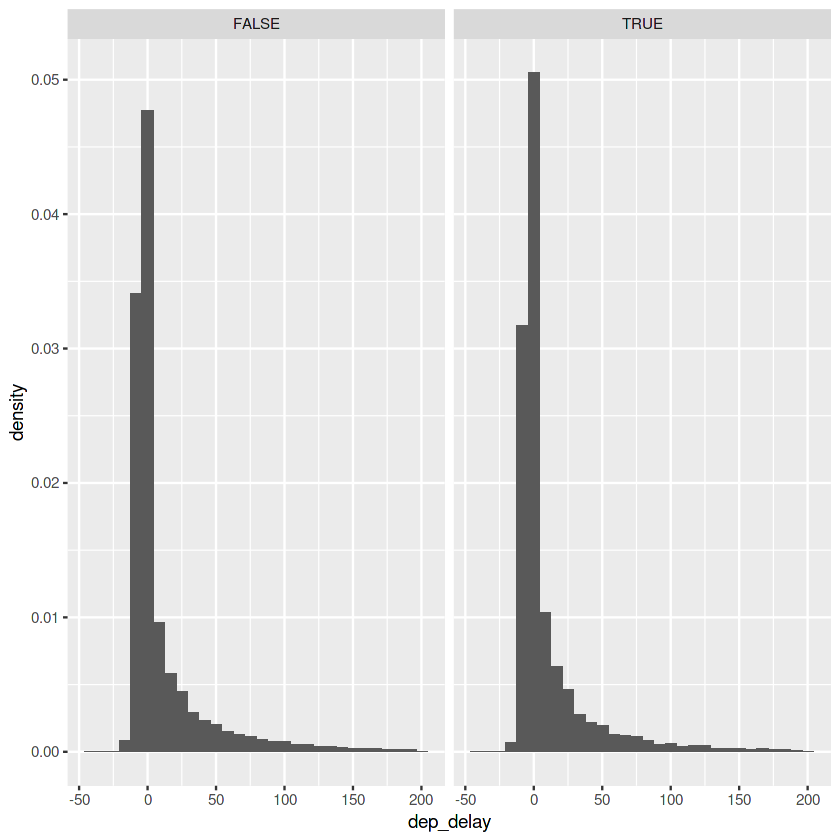

In [94]:
# departure delay by freezing weather

left_join(flights, weather) %>% select(year, month, day, dep_delay, temp) %>% 
    mutate(is_freezing = temp < 32) %>% filter(! is.na(is_freezing), dep_delay < 200) %>% 
    ggplot(aes(x = dep_delay, y = ..density..)) + geom_histogram() + facet_wrap(~ is_freezing)

## 🤔 Quiz
Assume every flight is full. The busiest travel day in terms of total # of passengers scheduled to depart is:

<ol style="list-style-type: upper-alpha;">
    <li> Jul. 3 </li>
    <li> Nov. 26</li>
    <li>Nov. 27</li>
    <li>Dec. 26</li>
    <li>Dec. 27</li>
</ol>

(Hint: the `planes` table tells you how many passengers each airplane holds.)

In [106]:
# total number of passengers

left_join(flights, planes) %>% select(month, day, seats) %>% group_by(month, day) %>% 
    summarize(passengers = sum(seats, na.rm = T)) %>% arrange(desc(passengers))

Joining with `by = join_by(year, tailnum)`
`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


month,day,passengers
<int>,<int>,<int>
12,27,7072
12,26,6785
12,23,6765
12,30,6703
12,28,6505
12,29,6473
12,31,6294
12,21,5988
12,25,5780


## Exercise
Another relational database we have seen in this class is the Lahman dataset on baseball stats:

In [108]:
library(Lahman)


The `Salaries` table contains information on player salaries, where they are available:

In [115]:
# Salaries
# People

Batting

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0
barkeal01,1871,1,RC1,NA,1,4,0,1,0,⋯,2,0,0,1,0,NA,NA,NA,NA,0
barnero01,1871,1,BS1,NA,31,157,66,63,10,⋯,34,11,6,13,1,NA,NA,NA,NA,1
barrebi01,1871,1,FW1,NA,1,5,1,1,1,⋯,1,0,0,0,0,NA,NA,NA,NA,0


## Exercise
How does a player's salary compare with their career batting average (or some other stat)?

Joining with `by = join_by(playerID, yearID, teamID, lgID)`
Warning message:
“Transformation introduced infinite values in continuous y-axis”


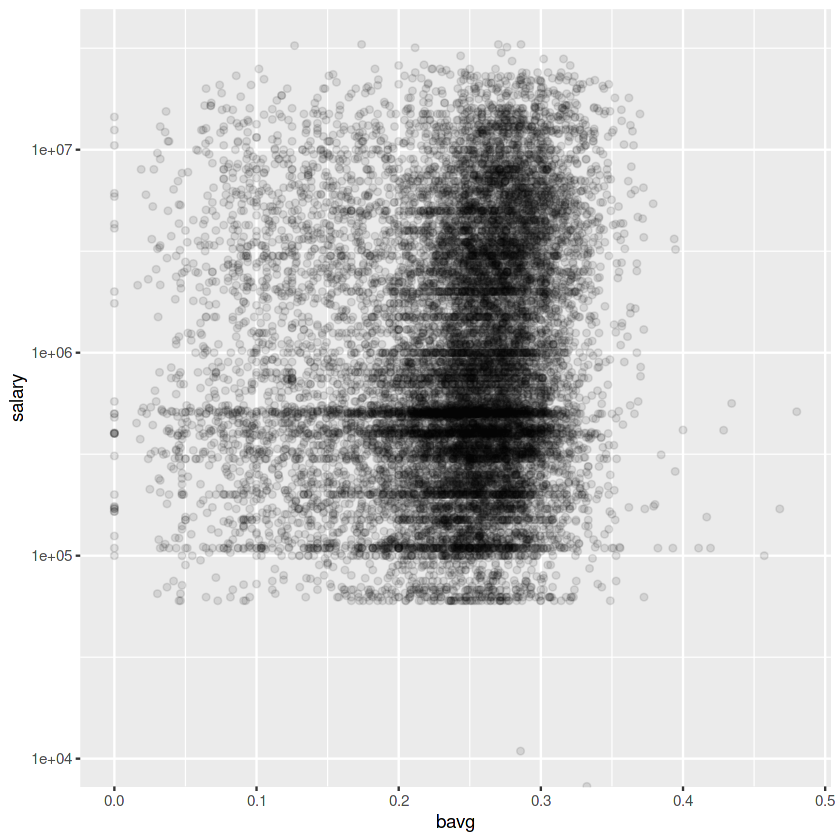

In [130]:
# salary vs batting average
Batting %>% mutate(bavg = H / AB) %>% filter(AB >= 20)  %>% 
    inner_join(Salaries) %>% ggplot(aes(x = bavg, y = salary)) +
    geom_point(alpha = .1) + scale_y_log10()

# adjust_for_inflation(prices, years, "US", to_date = 2022)

## Filtering joins

Filtering joins allow us to filter rows on one table based on their presence or absence in another table. We've already seen some examples of this on the problem sets:

In [132]:
top5 = count(flights, carrier) %>% top_n(5) %>% print
semi_join(flights, top5)

Selecting by n


# A tibble: 5 × 2
  carrier     n
  <chr>   <int>
1 AA      32729
2 B6      54635
3 DL      48110
4 EV      54173
5 UA      58665


Joining with `by = join_by(carrier)`


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


What if we wanted to filter based on more than one variable? For example, based on busiest days of the year:

In [57]:
top6_days = count(flights, year, month, day) %>% top_n(6) %>% 
    arrange(n) %>% print

Selecting by n


# A tibble: 7 x 4
   year month   day     n
  <int> <int> <int> <int>
1  2013     7    18  1003
2  2013     7    25  1003
3  2013     7     8  1004
4  2013     7    10  1004
5  2013    12     2  1004
6  2013     7    11  1006
7  2013    11    27  1014


In [1]:
# manual filter join

### Semi-join
`semi_join(x, y)` keeps all the observations in `x` that are also in `y`.
![semi join](http://r4ds.had.co.nz/diagrams/join-semi.png)

`semi_join()` takes the same `key=` options as the other join commands.

In [56]:
# All flights in 6 busiest days of year:
semi_join(flights, top6_days, key = c("year", "month", "day")) %>% print

Joining, by = c("year", "month", "day")


# A tibble: 7,038 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    11    27       28           1930       298      129           2049
 2  2013    11    27      505            500         5      703            651
 3  2013    11    27      514            515        -1      743            808
 4  2013    11    27      535            540        -5      907            850
 5  2013    11    27      540            545        -5      815            835
 6  2013    11    27      551            600        -9      920            854
 7  2013    11    27      551            600        -9      918            849
 8  2013    11    27      554            600        -6      719            719
 9  2013    11    27      554            600        -6      707            717
10  2013    11    27      554            600        -6      907            846
# … with 7,028 more rows, and

### Exercise
Of the 336,776 flights in `flights`, what % of them departed on one of the 20 busiest days of the year?

In [13]:
# flights departing in the 20 top busiest days

### Anti-join
The opposite of a semi-join is an anti-join:
![anti-join](http://r4ds.had.co.nz/diagrams/join-anti.png)

## Filtering joins

Filtering joins allow us to filter rows on one table based on their presence or absence in another table. We've already seen some examples of this on the problem sets:

In [61]:
dest_top6 <- count(flights, dest) %>% top_n(6)
filter(flights, dest %in% dest_top6$dest) %>% nrow

Selecting by n


[1] 94326

### Semi-join
`semi_join(x, y)` keeps all the observations in `x` that are also in `y`.
![semi join](http://r4ds.had.co.nz/diagrams/join-semi.png)

In [74]:
# find all the flight with destinations in the top 6

## 🤔 Quiz
The top ten most popular days to fly were:

```count(flights, year, month, day) %>% top_n(10)```

What is the overall fraction of flights that left on these ten days?

<ol style="list-style-type: upper-alpha;">
    <li>0.024</li>
    <li>0.042</li>
    <li>1.000</li>
    <li>0.001</li>
    <li>0.039</li>
</ol>

### Anti-join
`anti_join(x, y)` does the opposite of `semi_join`: it *drops* all the observations in `x` that are also in `y`.
![anti join](https://r4ds.hadley.nz/diagrams/join/anti.png)

Anti-joins are useful for finding mismatches in joins. Last lecture we saw that some 50k entries in `flights` have `tailnum`s that do not exist in the `planes` table. To find out more about these flights we could use an anti-join to select only those rows:

In [10]:
missing_planes = anti_join(flights, planes, by="tailnum") %>% 
                 filter(!is.na(tailnum)) %>% print

# A tibble: 50,094 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      558            600        -2      753            745
 2  2013     1     1      559            600        -1      941            910
 3  2013     1     1      600            600         0      837            825
 4  2013     1     1      602            605        -3      821            805
 5  2013     1     1      608            600         8      807            735
 6  2013     1     1      611            600        11      945            931
 7  2013     1     1      623            610        13      920            915
 8  2013     1     1      624            630        -6      840            830
 9  2013     1     1      628            630        -2     1137           1140
10  2013     1     1      629            630        -1      824            810
# … with 50,084 more rows, a

Do we see any pattern in this table that could explain the missing tail numbers?

In [11]:
missing_planes %>% sample_n(100) %>% print(width = Inf)

# A tibble: 100 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     7     1551           1515        36     1723           1705
 2  2013     2    16      915            920        -5     1207           1245
 3  2013     4    29      858            900        -2     1143           1203
 4  2013     8    27     1932           1930         2     2238           2250
 5  2013    11    13     1504           1510        -6     2019           2020
 6  2013     8    24      943            950        -7     1201           1205
 7  2013     9    10     1421           1425        -4     1629           1650
 8  2013     5    31      733            740        -7     1025           1040
 9  2013     5    19     1846           1800        46     1959           1950
10  2013     1    23     1041           1050        -9     1229           1250
   arr_delay carrier flight tai

Interestingly, the top 5 most frequent `tailnum`s in the overall data are almost the same:

In [12]:
flights %>% drop_na(tailnum) %>% left_join(planes, by = "tailnum") %>% 
    count(tailnum, model) %>% top_n(5)

Selecting by n


  tailnum model  n  
1 N711MQ  G1159B 486
2 N713MQ  NA     483
3 N722MQ  NA     513
4 N723MQ  NA     507
5 N725MQ  NA     575

In [13]:
planes %>% filter(tailnum == "N711MQ")

  tailnum year type                    manufacturer         model  engines
1 N711MQ  1976 Fixed wing multi engine GULFSTREAM AEROSPACE G1159B 2      
  seats speed engine   
1 22    NA    Turbo-jet

The one plane that is represented is N711M. You can [look it up](https://flightaware.com/resources/registration/N711MQ) in an online database and find out it's a private jet. My guess is the others are private jets too.

<td>How many planes flew to destinations which are <i>not</i> found in the <code>airports</code> table?</td>

# SQL

SQL stands for "Structured Query Language". Many large databases are stored in SQL format, and you will probably encounter one if you work on big data and/or at a large company. 

In [179]:
# SQLite database
library(nycflights13)
library(DBI)
library(RSQLite)
con <- dbConnect(SQLite(), ":memory:")
copy_to(con, flights, "flights")
copy_to(con, airports, "airports")
copy_to(con, airlines, "airlines")
copy_to(con, planes, "planes")
copy_to(con, weather, "weather")
q <- function(...) dbGetQuery(con, ...) %>% as_tibble

### Selecting data from a table
The SQL syntax for selecting column(s) from a table is
```{sql}
SELECT <col1>, <col2>, ..., <coln> FROM <table>
```
Note the similarity to the corresponding `tidyverse` command:
```{r}
select(<table>, <col1>, <col2>, ..., <coln>)
```

In [137]:
# select one column

# q("SELECT * FROM flights")

select(flights, everything())

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


The special keyword `*` means "select everything" and is equivalent to `dplyr`'s `everything()`:

In [35]:
# select all columns

If you have a really big table, SQL allows you to `LIMIT` the number of rows it returns.

In [147]:
# query first ten rows of flights

# q("SELECT * FROM flights LIMIT 100")

flights %>% head(100)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### Distinct rows
Writing `SELECT DISTINCT` instead of `SELECT` will give every unique row in the data set:

In [151]:
# distinct year, month, day in flights

q('SELECT DISTINCT year, month, day FROM flights')

flights %>% select(year, month, day) %>% distinct

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,2
2013,1,3
2013,1,4
2013,1,5
2013,1,6
2013,1,7
2013,1,8
2013,1,9


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,2
2013,1,3
2013,1,4
2013,1,5
2013,1,6
2013,1,7
2013,1,8
2013,1,9


### Filtering

The SQL syntax for filtering rows in a table uses the `WHERE` clause:
```{sql}
SELECT * FROM <table> WHERE dest = "IAH"
```
This is the same as:
```{r}
filter(<table>, dest == "IAH")
```
Note that SQL uses a single `=` to check equality!

In [159]:
# select where

q("SELECT * FROM flights WHERE origin == 'JFK' AND dest == 'DTW' LIMIT 10")

# filter(flights, origin == "JFK" & dest == "DTW")

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,840,845,-5,1053,1102,-9,DL,2304,N926DL,JFK,DTW,108,509,8,45,1357045200
2013,1,1,1626,1630,-4,1855,1853,2,DL,702,N361NW,JFK,DTW,108,509,16,30,1357074000
2013,1,1,1825,1829,-4,2056,2053,3,9E,3286,N906XJ,JFK,DTW,107,509,18,29,1357081200
2013,1,2,843,845,-2,1103,1058,5,9E,3323,N918XJ,JFK,DTW,93,509,8,45,1357131600
2013,1,2,1627,1630,-3,1859,1853,6,DL,702,N331NW,JFK,DTW,96,509,16,30,1357160400
2013,1,2,1828,1829,-1,2107,2053,14,DL,1407,N613DL,JFK,DTW,95,509,18,29,1357167600
2013,1,3,853,855,-2,1120,1104,16,9E,3353,N922XJ,JFK,DTW,97,509,8,55,1357218000
2013,1,3,1554,1555,-1,1759,1817,-18,DL,1771,N366NB,JFK,DTW,91,509,15,55,1357243200
2013,1,3,1838,1815,23,2052,2037,15,9E,3424,N915XJ,JFK,DTW,87,509,18,15,1357254000


### Inequality in SQL
The write that something is *not equal* in SQL, we traditionally use the `<>` operator:

In [163]:
# all flights that are not destined for LAX

q('SELECT * FROM flights WHERE dest <> "LAX"')

# filter(flights, dest != 'LAX')

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,1357034400
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,1357034400
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,1357034400
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,1357034400
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,1357038000
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,1357034400
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,1357038000
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,1357038000
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,1357038000


Newer dialects of SQL (including SQLite) seem to let you use `!=` as well though.

### Missing data
In SQL, missing data is coded as `NULL`. This is a special value which is analogous to `NA` in R. 

In [169]:
# select non-null dep time

q('SELECT * FROM flights WHERE dep_delay IS NOT NULL')

# filter(flights, !is.na(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,1357034400
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,1357034400
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,1357034400
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,1357034400
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,1357038000
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,1357034400
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,1357038000
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,1357038000
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,1357038000


### Summarizing

The SQL syntax for summarizing is using the `GROUP BY` clause:
```{sql}
SELECT AVG(<col>) AS avg_col FROM <table> GROUP BY(<group cols>)
```
This is the same as:
```{r}
<table> %>% group_by(<group cols>) %>% summarize(avg_col = mean(<col>))
```

In [177]:
# select average distance and count for each day

q("SELECT year, month, day, AVG(distance) AS avg_dist, 
    COUNT() AS n FROM flights GROUP BY year, month, day")

flights %>% group_by(year, month, day) %>% summarize(avg_dist = mean(distance), n = n())

year,month,day,avg_dist,n
<int>,<int>,<int>,<dbl>,<int>
2013,1,1,1077.4299,842
2013,1,2,1053.1177,943
2013,1,3,1037.3709,914
2013,1,4,1032.4754,915
2013,1,5,1067.5917,720
2013,1,6,1051.6466,832
2013,1,7,998.2572,933
2013,1,8,985.5328,899
2013,1,9,981.4202,902


`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.


year,month,day,avg_dist,n
<int>,<int>,<int>,<dbl>,<int>
2013,1,1,1077.4299,842
2013,1,2,1053.1177,943
2013,1,3,1037.3709,914
2013,1,4,1032.4754,915
2013,1,5,1067.5917,720
2013,1,6,1051.6466,832
2013,1,7,998.2572,933
2013,1,8,985.5328,899
2013,1,9,981.4202,902


You can find a list of the aggregation functions that SQLite supports [here](https://www.sqlite.org/lang_aggfunc.html). This is a somewhat limited set compared to richer SQL engines like MySQL.

### Joins

The SQL syntax for joins:
```{sql}
SELECT * FROM <table> LEFT JOIN <other_table> ON <left_key_col> = <right_key_col>
```
This is the same as:
```{r}
left_join(<table>, <other_table>, by = c("<left_key_col>" = "<right_key_col>"))
```

In [189]:
# join planes by tailnum to flights

dbGetQuery(con, 
    "SELECT flights.year, planes.tailnum AS flightyr, * FROM flights 
    LEFT JOIN planes ON flights.tailnum = planes.tailnum"
)

flights %>% left_join(planes, by = "tailnum")

year,flightyr,year.1,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,time_hour,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,N14228,2013,1,1,517,515,2,830,819,⋯,1357034400,N14228,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,N24211,2013,1,1,533,529,4,850,830,⋯,1357034400,N24211,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,N619AA,2013,1,1,542,540,2,923,850,⋯,1357034400,N619AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,N804JB,2013,1,1,544,545,-1,1004,1022,⋯,1357034400,N804JB,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,N668DN,2013,1,1,554,600,-6,812,837,⋯,1357038000,N668DN,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,N39463,2013,1,1,554,558,-4,740,728,⋯,1357034400,N39463,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan
2013,N516JB,2013,1,1,555,600,-5,913,854,⋯,1357038000,N516JB,2000,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NA,Turbo-fan
2013,N829AS,2013,1,1,557,600,-3,709,723,⋯,1357038000,N829AS,1998,Fixed wing multi engine,CANADAIR,CL-600-2B19,2,55,NA,Turbo-fan
2013,N593JB,2013,1,1,557,600,-3,838,846,⋯,1357038000,N593JB,2004,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan


year.x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,minute,time_hour,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dttm>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,15,2013-01-01 05:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,533,529,4,850,830,20,UA,⋯,29,2013-01-01 05:00:00,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,542,540,2,923,850,33,AA,⋯,40,2013-01-01 05:00:00,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,45,2013-01-01 05:00:00,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,554,600,-6,812,837,-25,DL,⋯,0,2013-01-01 06:00:00,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,554,558,-4,740,728,12,UA,⋯,58,2013-01-01 05:00:00,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan
2013,1,1,555,600,-5,913,854,19,B6,⋯,0,2013-01-01 06:00:00,2000,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NA,Turbo-fan
2013,1,1,557,600,-3,709,723,-14,EV,⋯,0,2013-01-01 06:00:00,1998,Fixed wing multi engine,CANADAIR,CL-600-2B19,2,55,NA,Turbo-fan
2013,1,1,557,600,-3,838,846,-8,B6,⋯,0,2013-01-01 06:00:00,2004,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan


Note here that SQL requires us to be explicit about which columns we are `SELECT`ing when joining multiple tables. Each column name must be prefixed with the name of the table in which it resides.

### Ranking

Ranking operates slightly differently in SQL than dplyr. The overall syntax is:


    SELECT RANK() OVER (
	    PARTITION BY <columns>
	    ORDER BY <expression1> [ASC|DESC], ...
    ) RankedCol FROM <table>
    
    
The easiest way to learn it is to see some examples.

In [196]:
# rank departure delay by day

q('SELECT year, month, day, dep_delay, RANK() OVER (
    PARTITION BY month, day 
    ORDER BY dep_delay DESC
    ) r FROM flights WHERE r <= 2')

#flights %>% group_by(month, day) %>% mutate(r = min_rank(-dep_delay)) %>% 
#    select(month, day, dep_delay, r) %>% filter(r <= 2)



ERROR: Error: misuse of aliased window function r


## Subqueries

An aspect of SQL I find confusing is that you can filter (`WHERE ...`) based on a ranking condition:

In [199]:
q('SELECT year, month, day, dep_delay, r FROM 
    (
        SELECT year, month, day, dep_delay, RANK() OVER (
        PARTITION BY month, day 
        ORDER BY dep_delay DESC
    ) r FROM flights)
    WHERE r <= 2
')


year,month,day,dep_delay,r
<int>,<int>,<int>,<dbl>,<int>
2013,1,1,853,1
2013,1,1,379,2
2013,1,2,379,1
2013,1,2,337,2
2013,1,3,291,1
2013,1,3,268,2
2013,1,4,288,1
2013,1,4,208,2
2013,1,5,327,1


Instead, you can write a *subquery*, basically stitching two SQL calls together:

    WITH (<a SQL query>) AS table
    SELECT <stuff> FROM table WHERE <conditions>
    

In [44]:
# filtering with rank

## Advanced joins in SQL
SQL is more general in specifying the join condition. Whereas in tidyverse it must be a key, in
SQL it can be a general logical condition.

## Example
What is the closest airport to `DTW`?

In [42]:
# find the nearest neighbor to each airport

Let's use this to build a map of every airport's nearest neighbor:

In [45]:
# compute air_nn, every airport's nearest neighbor



In [43]:
air_nn  %>% filter(lat < 50, lat > 23) %>%
    ggplot + 
    geom_segment(aes(x = lon, y = lat, xend = lon2, yend = lat2), color="blue") +
    geom_point(aes(x = lon, y = lat)) + 
    coord_quickmap()

ERROR: Error in filter(., lat < 50, lat > 23): object 'air_nn' not found


## Exercise
In 1985 a hurricane made landfall on Long Island, NY between JFK Airport and Islip.
What was the name of that hurricane?

In [156]:
jfk <- airports %>% filter(faa == "JFK")
jfk$lon
jfk$lat
storms %>% mutate(dist = sqrt((lat -+ jfk$lat)^2 + (long - jfk$lon)^2)) %>% select(dist, everything()) %>%
    arrange(dist) %>% slice(1:3)

[1] -73.77893

[1] 40.63975

  dist      name   year month day hour lat  long  status              category
1 0.2817433 Floyd  1999 9     17   0   40.6 -73.5 tropical storm      0       
2 0.4805718 Gloria 1985 9     27  16   40.6 -73.3 hurricane           1       
3 0.5881268 Chris  1988 8     30   0   41.2 -73.6 tropical depression -1      
  wind pressure ts_diameter hu_diameter
1 50    980     NA          NA         
2 75    961     NA          NA         
3 20   1008     NA          NA         